In [1]:
import pandas as pd
import numpy as np
import os

import sklearn.datasets
import matplotlib.pyplot as plt
import math

import random

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

Load the digits dataset from the sklearn.datasets library.

Display the shape of X (feature data) and y (label data) to understand the dataset's dimensions.

Randomly split the dataset into training and test sets, reserving 500 samples for the test set.

Display the shapes of X_train, y_train, X_test, and y_test to confirm the correct split.

In [2]:
# load the data set
dataset = sklearn.datasets.load_digits(as_frame = False)

# get X and y
X = dataset.data
y = dataset.target

# display the shape of X and y
print('X: ', X.shape)
print('y: ', y.shape)

# randomly split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = (500/1797))

# display the shapes of the training and test sets
print('X_train: ',  X_train.shape)
print('X_test: ',  X_test.shape)
print('y_train: ',  y_train.shape)
print('y_test: ',  y_test.shape)

X:  (1797, 64)
y:  (1797,)
X_train:  (1297, 64)
X_test:  (500, 64)
y_train:  (1297,)
y_test:  (500,)


Select 10 random images from X_train and their corresponding labels from y_train.

Display these images in a grid using matplotlib, with each image labeled with its corresponding digit. Use grayscale to exmphasize pixel intensity.

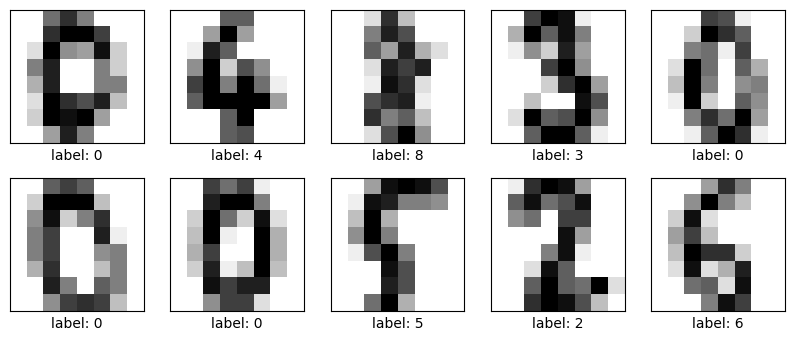

In [3]:
# select 10 images
    # get their labels as well?
nums = random.sample(range(1, 1297), 10)

X_imgs = X_train[nums]
y_imgs = y_train[nums]

# show them in a grid
    # label with the digit and use grayscale
def plot_imgs(images, labels=None):
    X_imgs_display = []
    for i in range(0, 10):
        X_imgs_display.append(images[i].reshape((8, 8)))
    images = X_imgs_display
    subplots_x = int(math.ceil(len(images) / 5))
    plt.figure(figsize=(10,2*subplots_x))
    for i in range(min(len(images), subplots_x*5)):
        plt.subplot(subplots_x,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        if labels is not None:
            plt.xlabel("label: " + str(labels[i]))
    plt.show()

plot_imgs(X_imgs, y_imgs)

Use sklearn's KNeighborsClassifier to create and train a k-NN classifier.

Train five separate classifiers with k = 1, 3, 5, 7, and 9.

For each classifier, fit the model using X_train and y_train.

In [4]:
# create the classifier
model1 = KNeighborsClassifier(n_neighbors=1)
model3 = KNeighborsClassifier(n_neighbors=3)
model5 = KNeighborsClassifier(n_neighbors=5)
model7 = KNeighborsClassifier(n_neighbors=7)
model9 = KNeighborsClassifier(n_neighbors=9)

# train it
model1.fit(X_train, y_train) 
model3.fit(X_train, y_train) 
model5.fit(X_train, y_train) 
model7.fit(X_train, y_train) 
model9.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=9)

For each trained classifier (one per k value), predict the labels of X_test and calculate the F1 score using y_test as the ground truth.

Use the f1_score function from sklearn.metrics with average = 'weighted' to account for class distribution.

Display the F1 scores in a table (using Markdown or pd.DataFrame) for each k value.

Summarize findings in a Markdown cell, discussing any patterns or trends observed across different k values, inlcuding changes in F1 scores.

In [5]:
# predict the labels
prediction1 = model1.predict(X_test)
prediction3 = model3.predict(X_test)
prediction5 = model5.predict(X_test)
prediction7 = model7.predict(X_test)
prediction9 = model9.predict(X_test)

# get the F1 score
    # use f1_score with average = 'weighted'
    # repeat for all the other classifiers
f1_1 = f1_score(y_test, prediction1, average = 'weighted')
f1_3 = f1_score(y_test, prediction3, average = 'weighted')
f1_5 = f1_score(y_test, prediction5, average = 'weighted')
f1_7 = f1_score(y_test, prediction7, average = 'weighted')
f1_9 = f1_score(y_test, prediction9, average = 'weighted')

# display in a table
print('f1_1: ', f1_1)
print('f1_3: ', f1_3)
print('f1_5: ', f1_5)
print('f1_7: ', f1_7)
print('f1_9: ', f1_9)

f1_1:  0.9839284052784214
f1_3:  0.9779520829729443
f1_5:  0.9819899657144218
f1_7:  0.9760713352276809
f1_9:  0.9760713352276809


The trends seems to be of results getting worse with more neighbors, although never by much. All of the f1 scores are well above 0.9, which means they are all incredibly good scores. The decrease is noticeable, but still minimal.

For each classifier (with k = 1, 3, 5, 7, 9), select a few random images from X_test to display predictions.

Display each image with its predicted label and true label, annotating each plot with the classifier's k value.

In a concluding Markdown cell, reflect on the results, noting any patterns or observations, especially for cases where predictions were correct or incorrect.

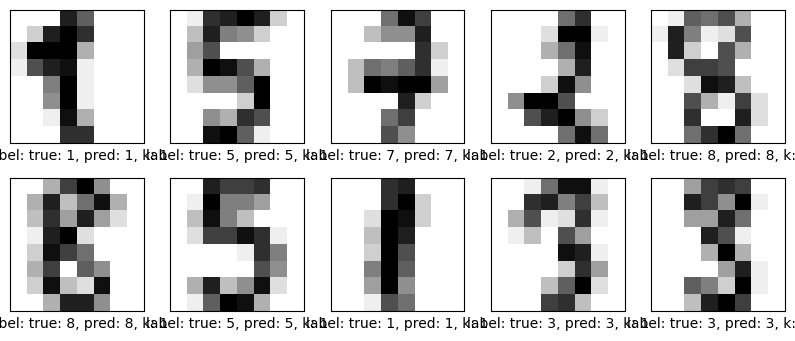

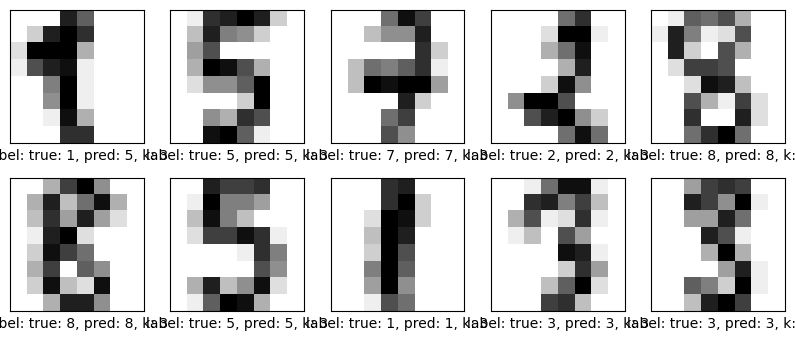

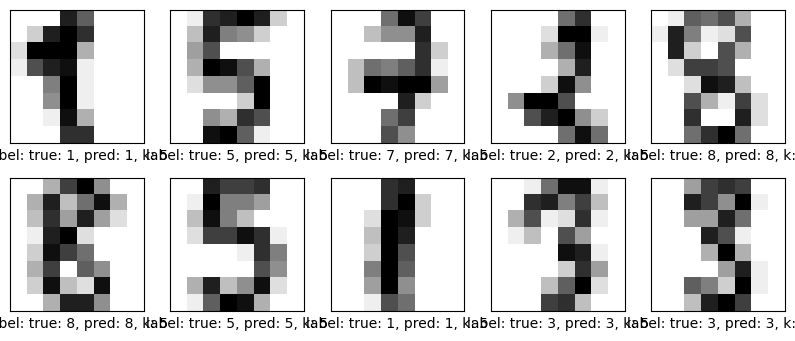

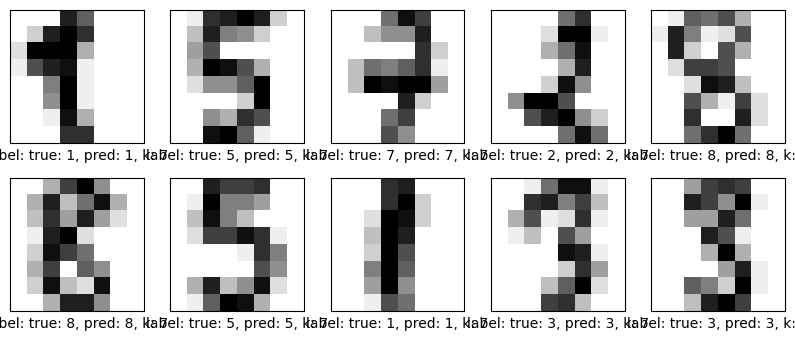

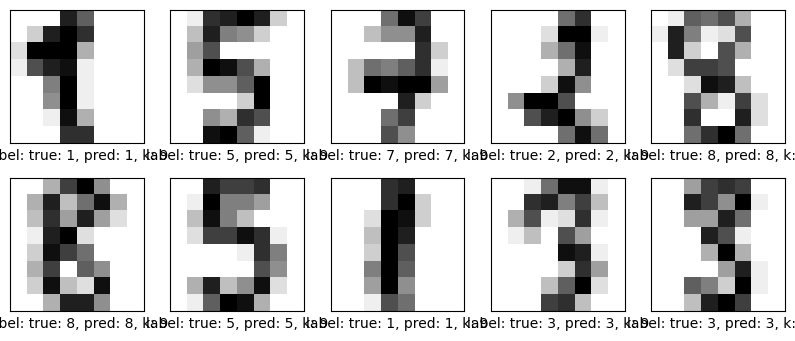

In [6]:
# select a few random images
    # display with predicted and true label, as well as k value
nums = random.sample(range(1, 500), 10)

X_imgs = X_test[nums]
y_imgs = y_test[nums]

y_imgs_full = []
for i in range(0, 10):
    y_imgs_full.append("true: " + str(y_imgs[i]) + ", pred: " + str(prediction1[nums[i]]) + ", k: " + '1')
plot_imgs(X_imgs, y_imgs_full)

y_imgs_full = []
for i in range(0, 10):
    y_imgs_full.append("true: " + str(y_imgs[i]) + ", pred: " + str(prediction3[nums[i]]) + ", k: " + '3')
plot_imgs(X_imgs, y_imgs_full)

y_imgs_full = []
for i in range(0, 10):
    y_imgs_full.append("true: " + str(y_imgs[i]) + ", pred: " + str(prediction5[nums[i]]) + ", k: " + '5')
plot_imgs(X_imgs, y_imgs_full)

y_imgs_full = []
for i in range(0, 10):
    y_imgs_full.append("true: " + str(y_imgs[i]) + ", pred: " + str(prediction7[nums[i]]) + ", k: " + '7')
plot_imgs(X_imgs, y_imgs_full)

y_imgs_full = []
for i in range(0, 10):
    y_imgs_full.append("true: " + str(y_imgs[i]) + ", pred: " + str(prediction9[nums[i]]) + ", k: " + '9')
plot_imgs(X_imgs, y_imgs_full)

The results were incredibly good for all values of k. In all of the sample cases, the prediction was accurate. The method of KNN seemed to work very well for this kind of problem, as both the f1 values and these sample things to plot show.